In [1]:
# Outlier Detection from Scratch - Educational Notebook

import math
import random
import matplotlib.pyplot as plt


# 1. Z-Score Method
def z_score_outliers(data, threshold=3):
    mean = sum(data) / len(data)
    std_dev = (sum((x - mean)**2 for x in data) / len(data))**0.5
    outliers = [x for x in data if abs((x - mean) / std_dev) > threshold]
    return outliers

# 2. IQR Method
def iqr_outliers(data):
    sorted_data = sorted(data)
    n = len(sorted_data)

    def percentile(p):
        k = (n - 1) * p
        f = int(k)
        c = f + 1
        if c >= n: return sorted_data[f]
        return sorted_data[f] + (sorted_data[c] - sorted_data[f]) * (k - f)

    q1 = percentile(0.25)
    q3 = percentile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower or x > upper]
    return outliers

# 3. MAD Method
def mad_outliers(data, threshold=3.5):
    sorted_data = sorted(data)
    n = len(sorted_data)
    median = sorted_data[n // 2] if n % 2 else (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
    deviations = [abs(x - median) for x in data]
    deviations_sorted = sorted(deviations)
    mad = deviations_sorted[n // 2] if n % 2 else (deviations_sorted[n // 2 - 1] + deviations_sorted[n // 2]) / 2
    outliers = [x for x in data if abs(x - median) / (mad if mad else 1) > threshold]
    return outliers

# 4. Mahalanobis Distance for Multivariate Outliers
def mahalanobis_outliers(data_2d, threshold=3):
    import numpy as np
    X = np.array(data_2d)
    mean_vec = np.mean(X, axis=0)
    cov_matrix = np.cov(X.T)
    inv_cov = np.linalg.inv(cov_matrix)
    distances = []
    for x in X:
        diff = x - mean_vec
        dist = np.sqrt(np.dot(np.dot(diff, inv_cov), diff.T))
        distances.append(dist)
    return [tuple(data_2d[i]) for i, d in enumerate(distances) if d > threshold]

# 5. KMeans-based Outlier Detection
def kmeans_outliers(data_2d, k=2, top_n=1):
    import numpy as np
    from sklearn.cluster import KMeans

    X = np.array(data_2d)
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    centers = km.cluster_centers_
    labels = km.labels_
    distances = [np.linalg.norm(X[i] - centers[labels[i]]) for i in range(len(X))]
    outlier_indices = sorted(range(len(distances)), key=lambda i: distances[i], reverse=True)[:top_n]
    return [tuple(X[i]) for i in outlier_indices]

# Visualization Support
def plot_data_with_outliers(data, outliers, title):
    plt.figure(figsize=(8, 2))
    plt.plot(data, 'bo-', label='Data')
    for out in outliers:
        plt.plot(data.index(out), out, 'ro', label='Outlier')
    plt.title(title)
    plt.legend()
    plt.show()



Original Data: [10, 12, 12, 13, 12, 11, 14, 10, 11, 100, 13, 11, 12, 13, 12]
Z-Score Outliers: [100]
IQR Outliers: [100]
MAD Outliers: [100]
Mahalanobis Outliers: []
KMeans Outliers: [(np.int64(10), np.int64(10))]


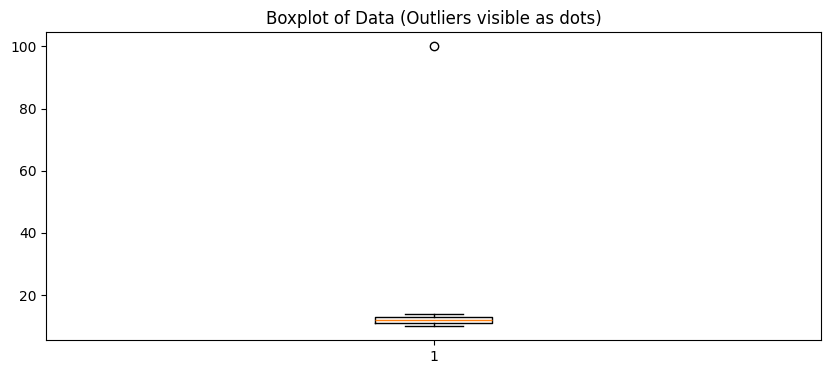

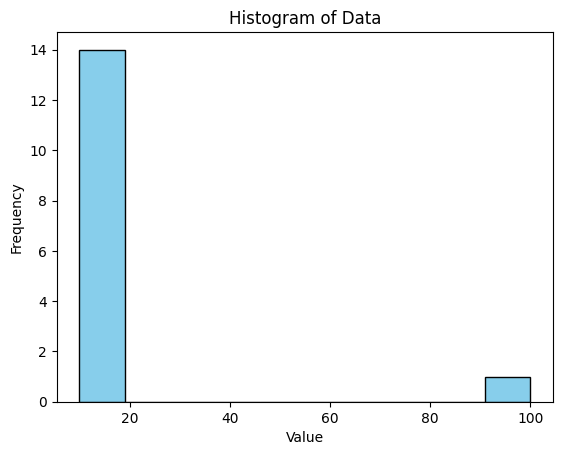

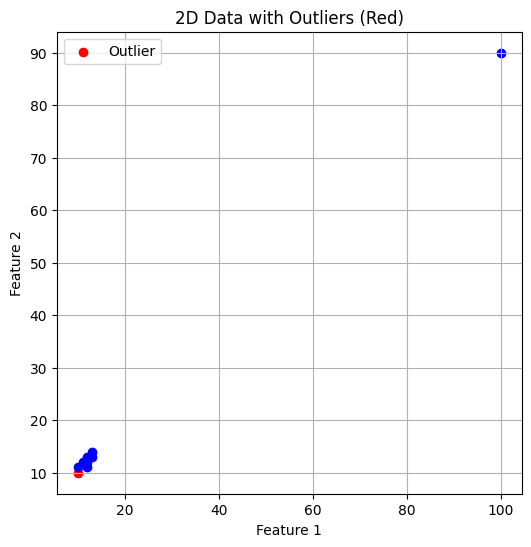

In [2]:

# Sample Data for Testing (1D and 2D)
data = [10, 12, 12, 13, 12, 11, 14, 10, 11, 100, 13, 11, 12, 13, 12]
data_2d = [(10, 10), (12, 13), (11, 12), (10, 11), (13, 13), (12, 11), (100, 90), (13, 14), (12, 12)]

# Run and Print
print("Original Data:", data)
print("Z-Score Outliers:", z_score_outliers(data))
print("IQR Outliers:", iqr_outliers(data))
print("MAD Outliers:", mad_outliers(data))
print("Mahalanobis Outliers:", mahalanobis_outliers(data_2d))
print("KMeans Outliers:", kmeans_outliers(data_2d))

# Visualization (1D)
plt.figure(figsize=(10, 4))
plt.boxplot(data)
plt.title("Boxplot of Data (Outliers visible as dots)")
plt.show()

plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 2D Scatter with Highlighted Outliers
outliers_kmeans = kmeans_outliers(data_2d, k=2, top_n=1)
outliers_mahal = mahalanobis_outliers(data_2d)

plt.figure(figsize=(6, 6))
for point in data_2d:
    if point in outliers_kmeans or point in outliers_mahal:
        plt.scatter(*point, color='red', label='Outlier' if 'Outlier' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(*point, color='blue')
plt.title("2D Data with Outliers (Red)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
